# <a href="https://thetahat.ru/courses/ph-ds-2024-aut">Phystech@DataScience</a>
## Домашнее задание 8

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1: 35 баллов
* Задача 2: 30 баллов

-----

In [ ]:
# Bot check

# HW_ID: phds_hw8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor

from catboost import CatBoostRegressor, Pool

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.utils import shuffle

plt.rcParams['axes.facecolor'] = 'lightgrey'
sns.set(palette='Set2', font_scale=1.6)

### Применения градиентного бустинга.

Градиентный бустинг может быть применен в огромном множестве реальных задач.

Реальные задачи, где применяется бустинг:    

☣

[Бустинг в предсказании лекарств](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-017-0209-z)

[Предсказание сайтов связывания белков с ДНК](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2527-1)

[Оценивание качества молекулярного докинга](https://pubmed.ncbi.nlm.nih.gov/30873528/)

[Бустинг и нейросети в задаче оценивания влияния вариаций в некодирующих регионах ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4768299/)

⚛

[Smuon collider analysis](https://arxiv.org/abs/2109.11815): применяется бустинг, PCA, отбор признаков.


[Бустинг и бозон Хиггса](http://proceedings.mlr.press/v42/chen14.pdf)

<!--
🏫

[Предсказание распределения студентов](https://www.researchgate.net/publication/338853863_STUDENT_PLACEMENT_PREDICTION_MODEL_USING_GRADIENT_BOOSTED_TREE_ALGORITHM)


[Моделирование индивидуального профиля студента](https://www.igi-global.com/article/student-profile-modeling-using-boosting-algorithms/284084) -->

### Задача 1

**Внимание!**

Не забудьте, что на тестовой выборке, по которой делаются итоговые выводы, ничего не должно обучаться.

*Совет. При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки оставшегося времени работы используйте tqdm в циклах.*

Для исследования вам предлагается несколько датасетов:

#### **Профиль биология:** [датасет](https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure) про физикохимические свойства третичной структуры белков.

В этом датасете содержатся следующие признаки:
```
 RMSD-Size of the residue.
 F1 - Total surface area.
 F2 - Non polar exposed area.
 F3 - Fractional area of exposed non polar residue.
 F4 - Fractional area of exposed non polar part of residue.
 F5 - Molecular mass weighted exposed area.
 F6 - Average deviation from standard exposed area of residue.
 F7 - Euclidian distance.
 F8 - Secondary structure penalty.
 F9 - Spacial Distribution constraints (N,K Value).
```




Мы будем предсказывать размер остатка (RMSD) по остальным признакам.
Датасет был получен с помощью [CASP9](https://predictioncenter.org/CASP9/).




Скачать датасет можно с помощью `sklearn`:

In [3]:
from sklearn.datasets import fetch_openml

protein = fetch_openml(name='physicochemical-protein')
data = pd.DataFrame(protein.data, columns=protein.feature_names)
X, y = data.drop("RMSD", axis=1), data.RMSD

Этот датасет большой по размеру, так что можете взять в качестве данных его случайную половину.

#### **Профиль физика:**  [датасет](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope) про излучение Черенкова.


Не забудьте назвать колонки в соотсветствии с признаками (см. описание датасета). Целевой меткой является переменная `class`. Преобразуйте метки классов в числа для корректной работы бустинга.

##### 1.

Повторите исследование, проведенное в предыдущем домашнем задании, используя градиентный бустинг из `sklearn`. Сравните полученные результаты со случайным лесом.

Вкратце опишем задания:
1. Посмотрите, как меняется качество модели в зависимости от значений гиперпараметров и сделайте выводы по результатам. Гиперпараметры:
    * количество деревьев (`n_estimators`) [от 1 до 400];
    * максимальная глубина дерева (`max_depth`) [от 3 до 15].
    * скорость обучения (`learning_rate`), поясните также смысл этого параметра.
2. Запустите модель три раза с параметрами по умолчанию. Объясните результаты.
3. Подберите оптимальные гиперпараметры, рассмотренные в первом пункте и зафиксируйте их.
4. Исследуйте зависимость метрики от количества признаков, по которым происходит разбиение в вершине дерева. Объясните результаты.
5. Исследуйте время работы фита и предикта, среднюю глубину деревьев и количество листьев в дереве.

In [4]:
data = data.sample(frac=0.5, random_state=42)
X, y = data.drop("RMSD", axis=1), data.RMSD

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
def cum_metric(model, metric, x_test, y_test):
    '''
    Считает значение метрики в зависимости от количества деревьев в модели

    Мы не обучаем много лесов с разным кол-вом деревьев,
    а смотрим на один обученный лес. Предсказание леса из k деревьев —
    усредненное предсказание первых k деревьев из нашего леса.

    Параметры.
    1) model — модель случайного леса,
    2) metric — вычисляемая метрика,
    3) x_test — данные тестовой выборки,
    4) y_test — метки тестовой выборки.
    '''

    predictions_by_stages = model.staged_predict(x_test)

    cumacc = [metric(y_test, pred) for pred in predictions_by_stages]
    return np.array(cumacc)

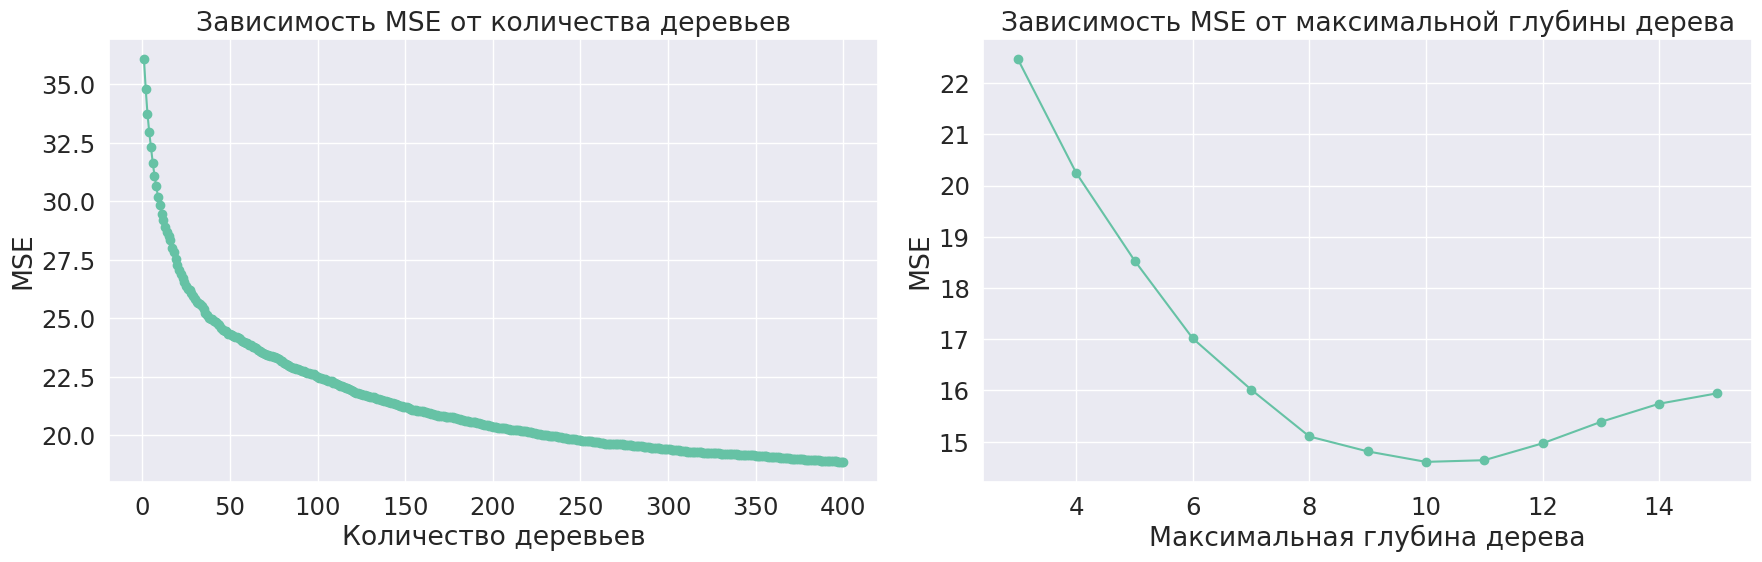

In [10]:
from sklearn.metrics import mean_squared_error

X_train = np.array(X_train)
X_test = np.array(X_test)

n_estimators_range = range(1, 401)
mse_values_n_estimators = []

model = GradientBoostingRegressor(n_estimators=400, random_state=42)
model.fit(X_train, y_train)

mse_values_n_estimators = cum_metric(model, mean_squared_error, X_test, y_test)

max_depth_range = range(3, 16)
mse_values_max_depth = []

for max_depth in max_depth_range:
    model = GradientBoostingRegressor(n_estimators=100, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values_max_depth.append(mse)


plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mse_values_n_estimators, marker='o')
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества деревьев')

plt.subplot(1, 2, 2)
plt.plot(max_depth_range, mse_values_max_depth, marker='o')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MSE')
plt.title('Зависимость MSE от максимальной глубины дерева')

plt.tight_layout()
plt.show()

при увеличении количества деревьев mse уменьшается, так как каждое новое дерево уменьшает ошибку предыдущего.

при max_depth после 10 модель начинает переобучаться.

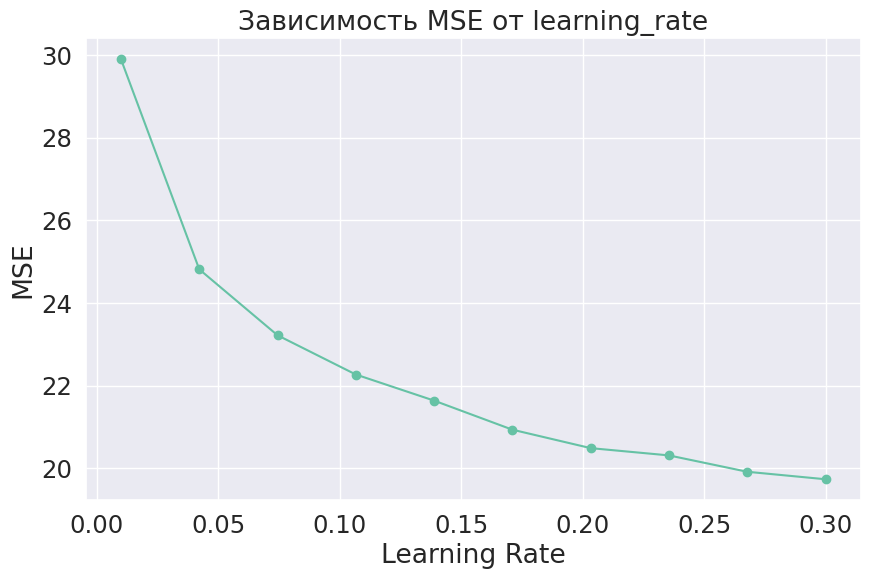

In [11]:
learning_rate_range = np.linspace(0.01, 0.3, 10)
mse_values_learning_rate = []

for learning_rate in learning_rate_range:
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=learning_rate, max_depth=3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values_learning_rate.append(mse)


plt.figure(figsize=(10, 6))
plt.plot(learning_rate_range, mse_values_learning_rate, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('Зависимость MSE от learning_rate')
plt.grid(True)
plt.show()

при увеличении скорости обучения mse уменьшается, это может говорить о том, что модель начинает лучше обучаться.

In [14]:
def train_and_evaluate(X_train, y_train, X_test, y_test, random_state):
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse_values = []
for i in range(3):
    mse = train_and_evaluate(X_train, y_train, X_test, y_test, random_state=i)
    mse_values.append(mse)
    print(f"эксперимент {i+1}: MSE = {mse}")

эксперимент 1: MSE = 22.465113788769422
эксперимент 2: MSE = 22.465113788769422
эксперимент 3: MSE = 22.465113788769422


в отличие от случайного леса, градиентный бустинг берет последотельно одинаково деревья (без случаных подвыборок), соответственно, mse одинаковый.

In [16]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}


gb = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

print("лучшие параметры:", random_search.best_params_)
print("лучший результат (MSE):", -random_search.best_score_)

лучшие параметры: {'n_estimators': 350, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_depth': 9, 'learning_rate': 0.1}
лучший результат (MSE): 15.297003181283667


In [17]:
best_gb = random_search.best_estimator_
y_pred = best_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE на тестовой выборке:", mse)

MSE на тестовой выборке: 14.259122404394995


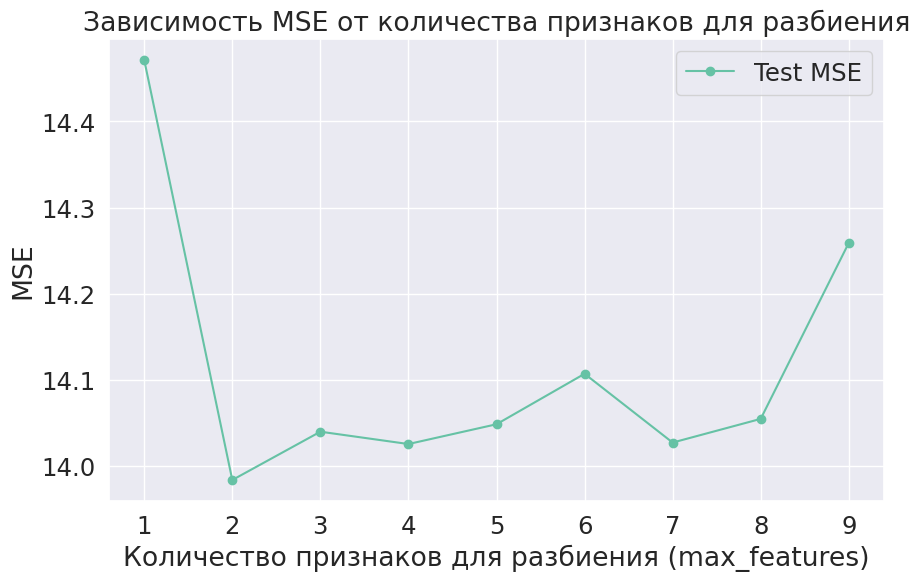

In [21]:
def train_and_evaluate(max_features):
    model = GradientBoostingRegressor(n_estimators=350, min_samples_split= 15, min_samples_leaf= 4, max_depth=9, learning_rate= 0.1,max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    return mse_train, mse_test


max_features_range = range(1, 10) # 9 признаков
mse_train_values = []
mse_test_values = []

for max_features in max_features_range:
    mse_train, mse_test = train_and_evaluate(max_features)
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)


plt.figure(figsize=(10, 6))
plt.plot(max_features_range, mse_test_values, marker='o', label='Test MSE')
plt.xlabel('Количество признаков для разбиения (max_features)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества признаков для разбиения')
plt.legend()
plt.grid(True)
plt.show()

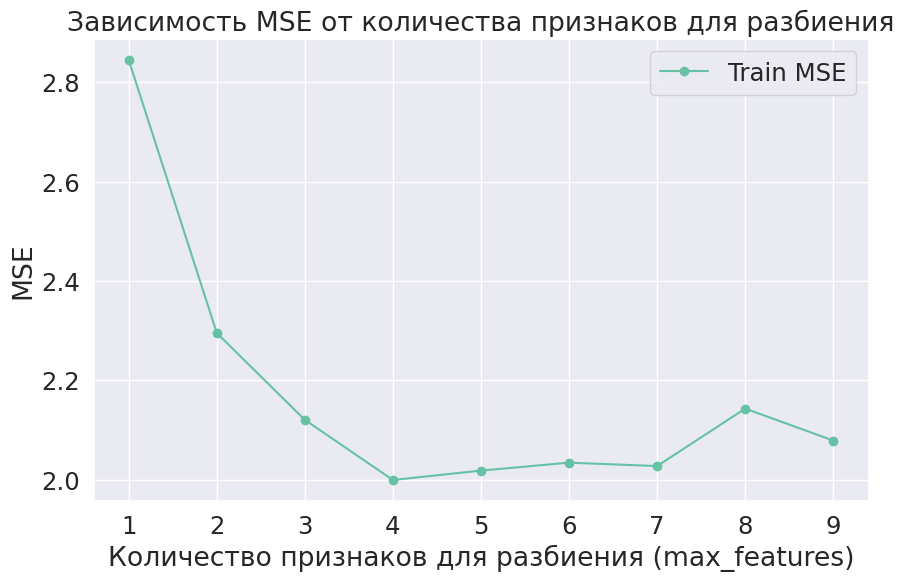

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(max_features_range, mse_train_values, marker='o', label='Train MSE')
plt.xlabel('Количество признаков для разбиения (max_features)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества признаков для разбиения')
plt.legend()
plt.grid(True)
plt.show()

mse падает, но потом модель начинает переобучаться

In [9]:
import time
from sklearn.metrics import mean_squared_error
model = GradientBoostingRegressor(n_estimators=350, min_samples_split= 15, min_samples_leaf= 4, max_depth=9, learning_rate= 0.1,max_features=4, random_state=42)

with tqdm(total=1, desc="Обучение модели") as pbar:
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    pbar.update(1)

with tqdm(total=1, desc="Предсказание") as pbar:
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    pbar.update(1)


mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)
print("Время обучения:", training_time, "секунд")
print("Время предсказания:", prediction_time, "секунд")


Обучение модели:   0%|          | 0/1 [00:00<?, ?it/s]

Предсказание:   0%|          | 0/1 [00:00<?, ?it/s]

MSE: 14.025846751935392
Время обучения: 43.152650117874146 секунд
Время предсказания: 0.11353063583374023 секунд


*Замечания.*
* В качестве основы можно использовать свое решение предыдущего задания. В большинстве случаев нужно только заменить `RandomForestRegressor` на `GradientBoostingRegressor`/ или`GradientBoostingClassifierr`.
* При сравнении методов по одинаковым свойствам желательно рисовать результаты на одном графике.
* Обратите внимание на метод `staged_predict` у `GradientBoostingRegressor`. Он позволяет получить "кумулятивные" предсказания, то есть по первым $t$ деревьям по всем значениям $t.$
* При желании, границы рассмотрения значений гиперпараметров можно увеличить.
* При подборе гиперпараметров при помощи рандомизированного поиска проводите достаточное количество на большой сетке параметров &mdash; как минимум 50. Даже если долго обучается.
* Используйте `tqdm` для оценки времени выполнения кода.

### 2.

Выберите самый значимый признак согласно `feature_importances_`. Визуализируйте работу бустинга, обученного только на одном этом признаке.

Для этого рассмотрите процесс построения бустинга для первых 10 итераций. При визуализации требуется для каждой итерации нарисовать:
* предсказания новой базовой модели и выборку, на которой эта базовая модель обучается;
* предсказания текущей композиции и исходную обучающую выборку.

Пример графиков смотрите в лекции в разделе бустинг в задаче регресии.

In [11]:
model.feature_importances_

array([0.07465329, 0.1210091 , 0.14569261, 0.19274643, 0.07170898,
       0.10344591, 0.09867946, 0.12117085, 0.07089336])

### Задача 2


Возьмем данные из предыдущего дз.

Исследуйте зависимость качества по метрике MAPE для моделей XGBoost, LightGBM,
CatBoost, а так же градиентного бустинга из sklearn, в зависимости от количества
деревьев, их максимальной глубины, шага обучения, а также различных регуляризаций.  При исследовании одного гиперпараметра рисуйте один график для всех моделей. Тщательно подберите цвета и тип линий так, чтобы картинка была легко читаемой. При проведении исследований не забывайте писать подробные комментарии
и выводы.

*Совет. Изучите ноутбук про данные фреймворки.*


Данные:

**Профиль физика:** <https://www.kaggle.com/datasets/khsamaha/solar-flares-rhessi>. Будем предсказывать длительность солнечных вспышек. Используйте файл с данными до 2018 года.

**Профиль биология:** <https://archive.ics.uci.edu/dataset/1/abalone>. Будем предсказывать возраст моллюсков.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

##### Загрузка и предобработка данных:

**Физика:**

In [ ]:
data = pd.read_csv('hessi.solar.flare.UP_To_2018.csv')

Закодируйте категориальные признаки, дату и время начала и время конца вспышки можно убрать.

**Биология:**

In [59]:
data = pd.read_csv('/content/abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                                          'Shucked weight', 'Viscera weight', 'Shell weight',
                                          'Rings'])

In [60]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Закодируйте категориальный признак.

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [62]:
X = data.drop('Rings', axis=1)
y = data['Rings'] + 1.5

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
from sklearn.metrics import mean_absolute_percentage_error

def calculate_mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

In [71]:
n_estimators_range = range(10, 301, 50)

results_n_estimators = {'XGBoost': [],'LightGBM': [],'CatBoost': [],'Sklearn GB': []}

In [72]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

for n_estimators in n_estimators_range:

    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42, verbosity=0)
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    xgb_mape = calculate_mape(y_test, xgb_pred)
    results_n_estimators['XGBoost'].append(xgb_mape)


    lgb_model = LGBMRegressor(n_estimators=n_estimators, random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)
    lgb_mape = calculate_mape(y_test, lgb_pred)
    results_n_estimators['LightGBM'].append(lgb_mape)


    cat_model = CatBoostRegressor(n_estimators=n_estimators, random_state=42, verbose=0)
    cat_model.fit(X_train, y_train)
    cat_pred = cat_model.predict(X_test)
    cat_mape = calculate_mape(y_test, cat_pred)
    results_n_estimators['CatBoost'].append(cat_mape)


    sk_model = GradientBoostingRegressor(n_estimators=n_estimators, random_state=42)
    sk_model.fit(X_train, y_train)
    sk_pred = sk_model.predict(X_test)
    sk_mape = calculate_mape(y_test, sk_pred)
    results_n_estimators['Sklearn GB'].append(sk_mape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 3132, number of used features: 8
[LightGBM] [Info] Start training from score 11.464879
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 3132, number of used features: 8
[LightGBM] [Info] Start training from score 11.464879
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of test

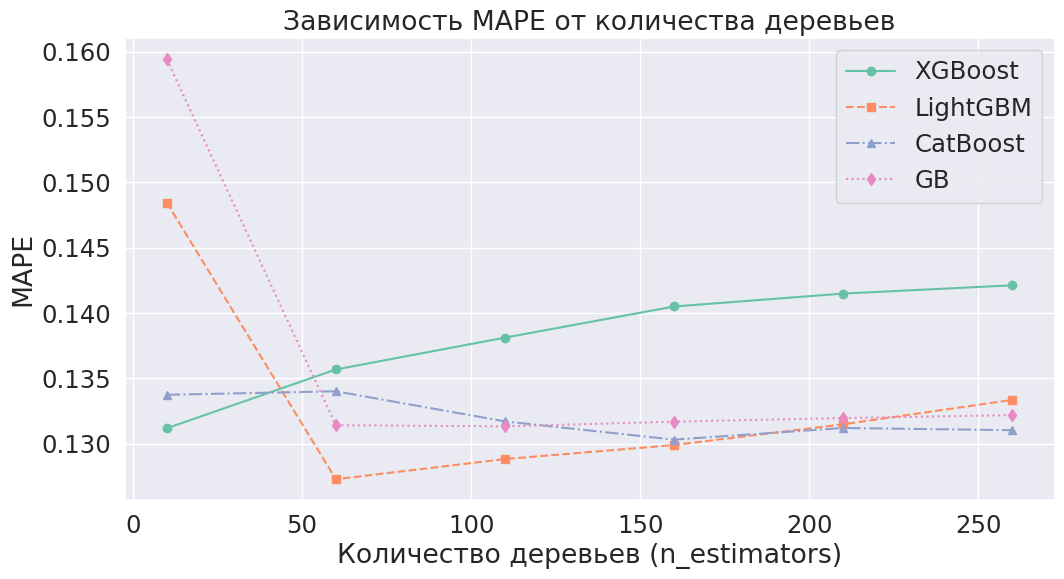

In [73]:
plt.figure(figsize=(12, 6))

plt.plot(n_estimators_range, results_n_estimators['XGBoost'], marker='o', linestyle='-', label='XGBoost')
plt.plot(n_estimators_range, results_n_estimators['LightGBM'], marker='s', linestyle='--', label='LightGBM')
plt.plot(n_estimators_range, results_n_estimators['CatBoost'], marker='^', linestyle='-.', label='CatBoost')
plt.plot(n_estimators_range, results_n_estimators['Sklearn GB'], marker='d', linestyle=':', label='GB')

plt.title('Зависимость MAPE от количества деревьев')
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()

mape падает с увеличением количества деревьев у всех моделей, кроме XGBoost. возможно так вышло, потому что 'XGBoost использует параллельное вычисление и обучаетсся (и переобучается тоже) быстрее остальных.

In [49]:
max_depth_range = range(2, 15)

In [50]:
results_max_depth = {'XGBoost': [],'LightGBM': [],'CatBoost': [],'Sklearn GB': []}



for max_depth in max_depth_range:
    xgb_model = XGBRegressor(max_depth=max_depth, random_state=42, verbosity=0)
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    xgb_mape = calculate_mape(y_test, xgb_pred)
    results_max_depth['XGBoost'].append(xgb_mape)

    lgb_model = LGBMRegressor( max_depth=max_depth,random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)
    lgb_mape = calculate_mape(y_test, lgb_pred)
    results_max_depth['LightGBM'].append(lgb_mape)

    cat_model = CatBoostRegressor( max_depth=max_depth, random_state=42, verbose=0)
    cat_model.fit(X_train, y_train)
    cat_pred = cat_model.predict(X_test)
    cat_mape = calculate_mape(y_test, cat_pred)
    results_max_depth['CatBoost'].append(cat_mape)

    sk_model = GradientBoostingRegressor (max_depth=max_depth, random_state=42)
    sk_model.fit(X_train, y_train)
    sk_pred = sk_model.predict(X_test)
    sk_mape = calculate_mape(y_test, sk_pred)
    results_max_depth['Sklearn GB'].append(sk_mape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 8
[LightGBM] [Info] Start training from score 9.944627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

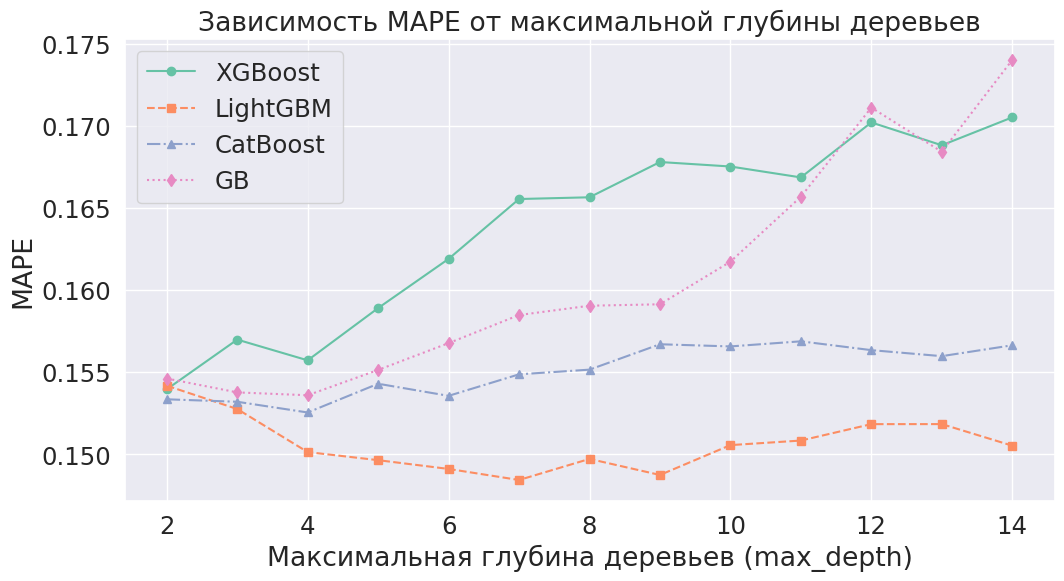

In [52]:
plt.figure(figsize=(12, 6))

plt.plot(max_depth_range, results_max_depth['XGBoost'], marker='o', linestyle='-', label='XGBoost')
plt.plot(max_depth_range, results_max_depth['LightGBM'], marker='s', linestyle='--', label='LightGBM')
plt.plot(max_depth_range, results_max_depth['CatBoost'], marker='^', linestyle='-.', label='CatBoost')
plt.plot(max_depth_range, results_max_depth['Sklearn GB'], marker='d', linestyle=':', label='GB')

plt.title('Зависимость MAPE от максимальной глубины деревьев')
plt.xlabel('Максимальная глубина деревьев (max_depth)')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()

тут аналогичная ситуация с графиком выше, может быть еще это связано с тем, что дефолтные параметры (кроме максимальной глуубины дерева, которая меняется) не подходят для наших данных.

In [53]:
learning_rate_range = np.linspace(0.01, 0.3, 10)
results_learning_rate = {'XGBoost': [],'LightGBM': [],'CatBoost': [],'Sklearn GB': []}

In [54]:
for learning_rate in learning_rate_range:
    xgb_model = XGBRegressor(learning_rate=learning_rate, random_state=42, verbosity=0)
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    xgb_mape = calculate_mape(y_test, xgb_pred)
    results_learning_rate['XGBoost'].append(xgb_mape)

    lgb_model = LGBMRegressor(learning_rate=learning_rate, random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)
    lgb_mape = calculate_mape(y_test, lgb_pred)
    results_learning_rate['LightGBM'].append(lgb_mape)

    cat_model = CatBoostRegressor(learning_rate=learning_rate, random_state=42, verbose=0)
    cat_model.fit(X_train, y_train)
    cat_pred = cat_model.predict(X_test)
    cat_mape = calculate_mape(y_test, cat_pred)
    results_learning_rate['CatBoost'].append(cat_mape)

    sk_model = GradientBoostingRegressor(learning_rate=learning_rate, random_state=42)
    sk_model.fit(X_train, y_train)
    sk_pred = sk_model.predict(X_test)
    sk_mape = calculate_mape(y_test, sk_pred)
    results_learning_rate['Sklearn GB'].append(sk_mape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 8
[LightGBM] [Info] Start training from score 9.944627
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 8
[LightGBM] [Info] Start training from score 9.944627
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testin

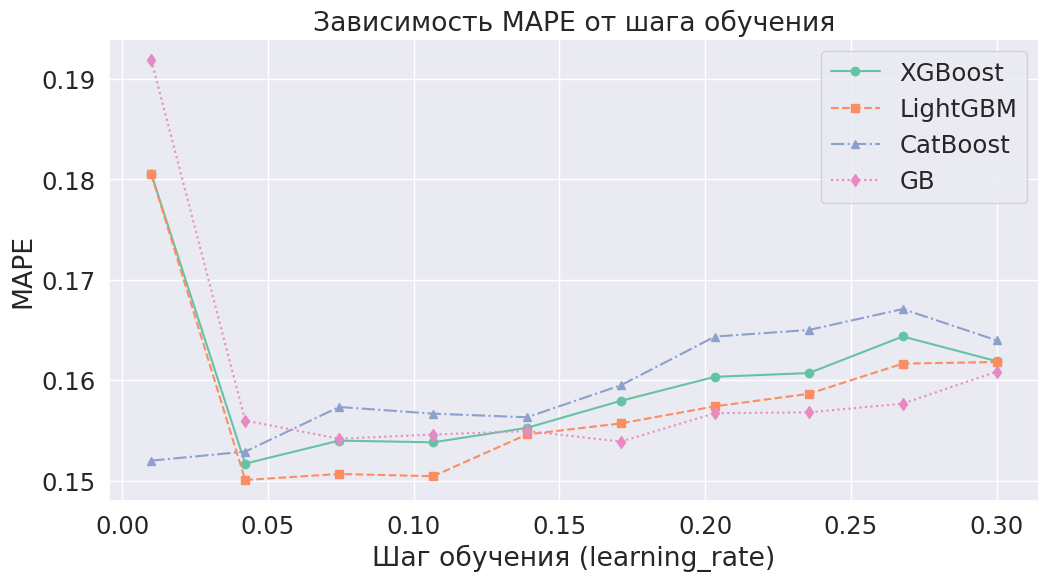

In [55]:
plt.figure(figsize=(12, 6))

plt.plot(learning_rate_range, results_learning_rate['XGBoost'], marker='o', linestyle='-', label='XGBoost')
plt.plot(learning_rate_range, results_learning_rate['LightGBM'], marker='s', linestyle='--', label='LightGBM')
plt.plot(learning_rate_range, results_learning_rate['CatBoost'], marker='^', linestyle='-.', label='CatBoost')
plt.plot(learning_rate_range, results_learning_rate['Sklearn GB'], marker='d', linestyle=':', label='GB')

plt.title('Зависимость MAPE от шага обучения')
plt.xlabel('Шаг обучения (learning_rate)')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()

catboost показывает более менее стабильные значения, это говорит о его устойчивости к скорости обучения. у других моделей mape сильно уменьшается, потом постепенно растет из-за больших шагов в обучении и переобучения.

In [57]:
subsample_range = np.linspace(0.5, 1.0, 6)

results_subsample = {'XGBoost': [],'LightGBM': [],'CatBoost': [],'Sklearn GB': []}


for subsample in subsample_range:
    xgb_model = XGBRegressor( subsample=subsample,
                             random_state=42, verbosity=0)
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    xgb_mape = calculate_mape(y_test, xgb_pred)
    results_subsample['XGBoost'].append(xgb_mape)


    lgb_model = LGBMRegressor( subsample=subsample,
                              random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_test)
    lgb_mape = calculate_mape(y_test, lgb_pred)
    results_subsample['LightGBM'].append(lgb_mape)

    cat_model = CatBoostRegressor( random_state=42, verbose=0,
                                  subsample=subsample)
    cat_model.fit(X_train, y_train)
    cat_pred = cat_model.predict(X_test)
    cat_mape = calculate_mape(y_test, cat_pred)
    results_subsample['CatBoost'].append(cat_mape)

    sk_model = GradientBoostingRegressor( subsample=subsample,
                                         random_state=42)
    sk_model.fit(X_train, y_train)
    sk_pred = sk_model.predict(X_test)
    sk_mape = calculate_mape(y_test, sk_pred)
    results_subsample['Sklearn GB'].append(sk_mape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 8
[LightGBM] [Info] Start training from score 9.944627
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 3341, number of used features: 8
[LightGBM] [Info] Start training from score 9.944627
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testin

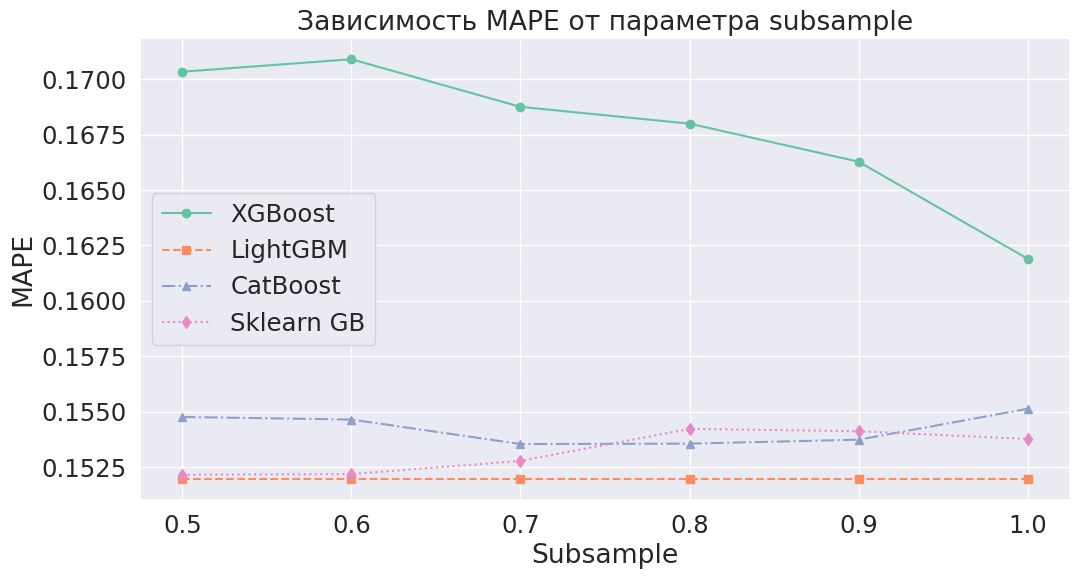

In [58]:
plt.figure(figsize=(12, 6))

plt.plot(subsample_range, results_subsample['XGBoost'], marker='o', linestyle='-', label='XGBoost')
plt.plot(subsample_range, results_subsample['LightGBM'], marker='s', linestyle='--', label='LightGBM')
plt.plot(subsample_range, results_subsample['CatBoost'], marker='^', linestyle='-.', label='CatBoost')
plt.plot(subsample_range, results_subsample['Sklearn GB'], marker='d', linestyle=':', label='Sklearn GB')

plt.title('Зависимость MAPE от параметра subsample')
plt.xlabel('Subsample')
plt.ylabel('MAPE')
plt.legend()
plt.grid(True)
plt.show()

xgboost явно не подходит для наших данных и во всех экспериментах показывает странное поведение mape.

маленькие значения subsample помогают помочь избежать переобучения, но слишком маленькие значения могут ухудшают качество модели

